# Movies Industry
_Agif Ridho Rizkiawan (April 2023)_
____
**Objective**

The data gathered from Kaggle. This notebook aims at analyzing and EDA the content of Movie Industry Context focused on movie revenue and analyze it over the last decades. There are more factors that intervene in this
kind of thing, like actors, genres, user ratings and more.
___
___

**1. Data Preparation**
   - 1.1 Import Necessary Libraries
   - 1.2 Upload Movies DataFrame
   

**2. Data Cleaning**

   - 2.1 Check Missing Values, Dtype
   - 2.2 Drop Unused Column
   - 2.3 Change Dtype
   - 2.4 Add 2 new column (Profit, Profit (%))
   - 2.5 Check Duplicate
   - 2.6 Trim
   - 2.7 Check Typos

**3. Correlation**

**4. Exploratory Data Analysis**

   - 4.1 Most Profitable Company
   - 4.2 Most Highest Budget Company
   - 4.3 Most Highest Gross Company
   - 4.4 Star and Directors Wordcloud

#### ***1. Data Preparation***

***1.1 Import Necessary Libraries***

In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.pyplot import figure
from wordcloud import WordCloud
import warnings

plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
warnings.filterwarnings('ignore')

***1.2 Upload Movies DataFrame***

In [73]:
# Upload Movies DataFrame
mv = pd.read_csv(r'C:\Users\agifr\Projects\Movies Industry\movies.csv')
mv.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


#### ***2. Data Cleaning***

***2.1 Check Missing Values, Dtype***

In [74]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


- Findings
  * As we can see we have total 2473 missing values **(32.24% from total data)**.
  * Some columns that have wrong Dtype and unordered format in released column.
- Handling
  * I'll remove all rows that contains null values, because i want to calculate the profit of each movies.
  * I'll use str_split function to extraxt only datetime, and remove the country string in released column and finally convert the Dtype to datetime.


In [75]:
# Drop null rows
mv = mv.dropna(axis=0)

In [76]:
# Extract Datetime only
mv['correct_released'] = mv['released'].str.split('(').str[0]
pd.set_option('display.max_rows',None)
# Convert to datetime
mv['correct_released'] = pd.to_datetime(mv['correct_released'])

In [77]:
# Check again for missing values and new correct release column
print(mv.info())
mv.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              5421 non-null   object        
 1   rating            5421 non-null   object        
 2   genre             5421 non-null   object        
 3   year              5421 non-null   int64         
 4   released          5421 non-null   object        
 5   score             5421 non-null   float64       
 6   votes             5421 non-null   float64       
 7   director          5421 non-null   object        
 8   writer            5421 non-null   object        
 9   star              5421 non-null   object        
 10  country           5421 non-null   object        
 11  budget            5421 non-null   float64       
 12  gross             5421 non-null   float64       
 13  company           5421 non-null   object        
 14  runtime           5421 n

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980-06-20


Looks good, this is what i wanted. let's just drop released year column.

***2.2 Drop Unused Column***

In [78]:
mv = mv.drop(['released'],axis=1)

In [79]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              5421 non-null   object        
 1   rating            5421 non-null   object        
 2   genre             5421 non-null   object        
 3   year              5421 non-null   int64         
 4   score             5421 non-null   float64       
 5   votes             5421 non-null   float64       
 6   director          5421 non-null   object        
 7   writer            5421 non-null   object        
 8   star              5421 non-null   object        
 9   country           5421 non-null   object        
 10  budget            5421 non-null   float64       
 11  gross             5421 non-null   float64       
 12  company           5421 non-null   object        
 13  runtime           5421 non-null   float64       
 14  correct_released  5421 n

***2.3 Change Dtype***

In [80]:
mv[['votes','budget','gross']] = mv[['votes','budget','gross']].astype('int64')
mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              5421 non-null   object        
 1   rating            5421 non-null   object        
 2   genre             5421 non-null   object        
 3   year              5421 non-null   int64         
 4   score             5421 non-null   float64       
 5   votes             5421 non-null   int64         
 6   director          5421 non-null   object        
 7   writer            5421 non-null   object        
 8   star              5421 non-null   object        
 9   country           5421 non-null   object        
 10  budget            5421 non-null   int64         
 11  gross             5421 non-null   int64         
 12  company           5421 non-null   object        
 13  runtime           5421 non-null   float64       
 14  correct_released  5421 n

***2.4 Add 2 new column (Profit, Profit (%))***

In [81]:
mv['profit'] = mv['gross'] - mv['budget']
mv ['profit (%)'] = round((mv['gross'] - mv['budget'])/mv['budget']*100,2)
mv.head(3)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_released,profit,profit (%)
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,27998772,147.36
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,54353106,1207.85
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,520375067,2890.97


In [82]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              5421 non-null   object        
 1   rating            5421 non-null   object        
 2   genre             5421 non-null   object        
 3   year              5421 non-null   int64         
 4   score             5421 non-null   float64       
 5   votes             5421 non-null   int64         
 6   director          5421 non-null   object        
 7   writer            5421 non-null   object        
 8   star              5421 non-null   object        
 9   country           5421 non-null   object        
 10  budget            5421 non-null   int64         
 11  gross             5421 non-null   int64         
 12  company           5421 non-null   object        
 13  runtime           5421 non-null   float64       
 14  correct_released  5421 n

Viewing the top 10 movies with highest profit percentage

In [83]:
mv = mv.sort_values(by=['profit (%)'],ascending=False)
mv.head(10)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_released,profit,profit (%)
5114,Paranormal Activity,R,Horror,2007,6.3,225000,Oren Peli,Oren Peli,Katie Featherston,United States,15000,193355800,Solana Films,86.0,2009-10-16,193340800,1288938.67
3459,The Blair Witch Project,R,Horror,1999,6.5,239000,Daniel Myrick,Daniel Myrick,Heather Donahue,United States,60000,248639099,Haxan Films,81.0,1999-07-30,248579099,414298.50
6815,The Gallows,R,Horror,2015,4.3,20000,Travis Cluff,Chris Lofing,Reese Mishler,United States,100000,42964410,New Line Cinema,81.0,2015-07-10,42864410,42864.41
2093,El Mariachi,R,Action,1992,6.9,64000,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000,2040920,Columbia Pictures,81.0,1993-02-26,2033920,29056.00
5154,Once,R,Drama,2007,7.8,112000,John Carney,John Carney,Glen Hansard,Ireland,150000,20936722,Bórd Scannán na hÉireann,86.0,2007-06-15,20786722,13857.81
2467,Clerks,R,Comedy,1994,7.7,214000,Kevin Smith,Kevin Smith,Brian O'Halloran,United States,27000,3151130,View Askew Productions,92.0,1994-11-09,3124130,11570.85
4471,Napoleon Dynamite,PG,Comedy,2004,6.9,204000,Jared Hess,Jared Hess,Jon Heder,United States,400000,46138887,Fox Searchlight Pictures,96.0,2004-08-27,45738887,11434.72
3233,In the Company of Men,R,Comedy,1997,7.2,13000,Neil LaBute,Neil LaBute,Aaron Eckhart,Canada,25000,2804473,Alliance Atlantis Communications,97.0,1997-08-01,2779473,11117.89
4814,Keeping Mum,R,Comedy,2005,6.8,34000,Niall Johnson,Richard Russo,Rowan Atkinson,United Kingdom,169000,18586834,Summit Entertainment,99.0,2006-10-06,18417834,10898.13
4304,Open Water,R,Adventure,2003,5.7,52000,Chris Kentis,Chris Kentis,Blanchard Ryan,United States,500000,54683487,Plunge Pictures LLC,79.0,2004-08-20,54183487,10836.70


***2.5 Check Duplicate***

Checking for duplicates

In [84]:
mv.duplicated().sum()

0

No duplicate found.

***2.6 Trim***

Trim extra whitespace

In [85]:
mv.columns.str.strip()
mv.head(5)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_released,profit,profit (%)
5114,Paranormal Activity,R,Horror,2007,6.3,225000,Oren Peli,Oren Peli,Katie Featherston,United States,15000,193355800,Solana Films,86.0,2009-10-16,193340800,1288938.67
3459,The Blair Witch Project,R,Horror,1999,6.5,239000,Daniel Myrick,Daniel Myrick,Heather Donahue,United States,60000,248639099,Haxan Films,81.0,1999-07-30,248579099,414298.50
6815,The Gallows,R,Horror,2015,4.3,20000,Travis Cluff,Chris Lofing,Reese Mishler,United States,100000,42964410,New Line Cinema,81.0,2015-07-10,42864410,42864.41
2093,El Mariachi,R,Action,1992,6.9,64000,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000,2040920,Columbia Pictures,81.0,1993-02-26,2033920,29056.00
5154,Once,R,Drama,2007,7.8,112000,John Carney,John Carney,Glen Hansard,Ireland,150000,20936722,Bórd Scannán na hÉireann,86.0,2007-06-15,20786722,13857.81


***2.7 Check Typos***

Checking for typos

In [86]:
for i in mv.columns:
  unique_data = mv[i].value_counts()
  print(unique_data,'\n')

Hercules                                                                               3
The Karate Kid                                                                         2
The Lion King                                                                          2
Parasite                                                                               2
Death at a Funeral                                                                     2
Heat                                                                                   2
The Girl with the Dragon Tattoo                                                        2
Impulse                                                                                2
Red Dawn                                                                               2
Child's Play                                                                           2
Crash                                                                                  2
Neighbors            

No typos found

#### ***3. Correlation***

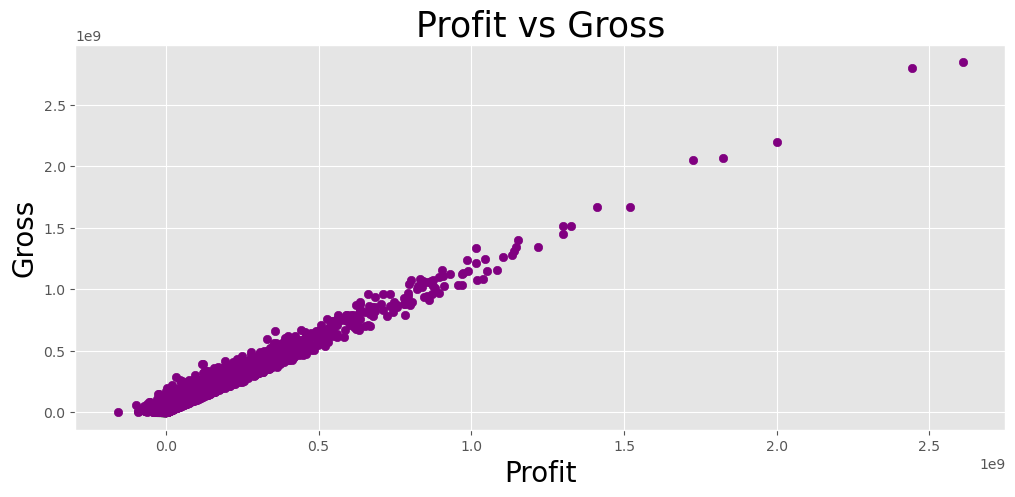

In [87]:
figure = plt.figure(figsize=(12,5))
plt.scatter(x=mv['profit'],y=mv['gross'],color='purple')
plt.title('Profit vs Gross',size=25)
plt.xlabel('Profit',size=20)
plt.ylabel('Gross',size=20)
plt.show()

In [88]:
mv.head(5)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_released,profit,profit (%)
5114,Paranormal Activity,R,Horror,2007,6.3,225000,Oren Peli,Oren Peli,Katie Featherston,United States,15000,193355800,Solana Films,86.0,2009-10-16,193340800,1288938.67
3459,The Blair Witch Project,R,Horror,1999,6.5,239000,Daniel Myrick,Daniel Myrick,Heather Donahue,United States,60000,248639099,Haxan Films,81.0,1999-07-30,248579099,414298.50
6815,The Gallows,R,Horror,2015,4.3,20000,Travis Cluff,Chris Lofing,Reese Mishler,United States,100000,42964410,New Line Cinema,81.0,2015-07-10,42864410,42864.41
2093,El Mariachi,R,Action,1992,6.9,64000,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000,2040920,Columbia Pictures,81.0,1993-02-26,2033920,29056.00
5154,Once,R,Drama,2007,7.8,112000,John Carney,John Carney,Glen Hansard,Ireland,150000,20936722,Bórd Scannán na hÉireann,86.0,2007-06-15,20786722,13857.81


<Axes: xlabel='profit', ylabel='gross'>

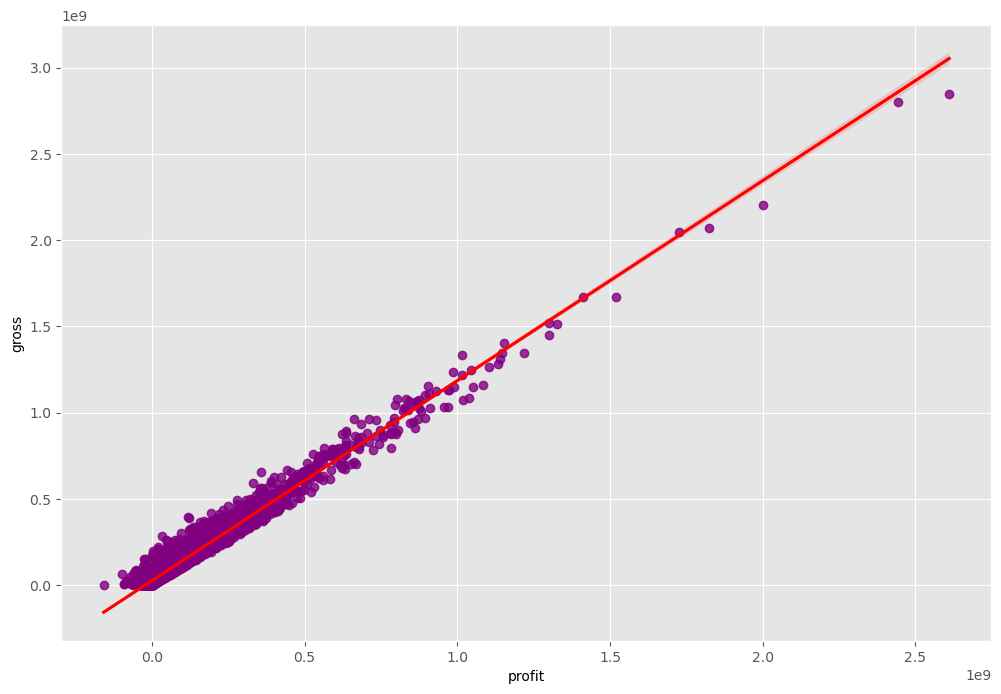

In [89]:
sns.regplot(x='profit',y='gross',data=mv,scatter_kws={'color':'purple'},line_kws={'color':'red'})

Profit and Gross had Perfect Positive Correlation.

In [90]:
# Correlations
mv.corr()

,year,score,votes,budget,gross,runtime,profit,profit (%)
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.237456,0.007513
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.243340,0.004068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.609203,0.017528
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.610530,-0.018164
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.984428,0.016289
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.241554,-0.024607
profit,0.237456,0.243340,0.609203,0.610530,0.984428,0.241554,1.000000,0.023937
profit (%),0.007513,0.004068,0.017528,-0.018164,0.016289,-0.024607,0.023937,1.000000


There is high correlation between Profit and Gross.

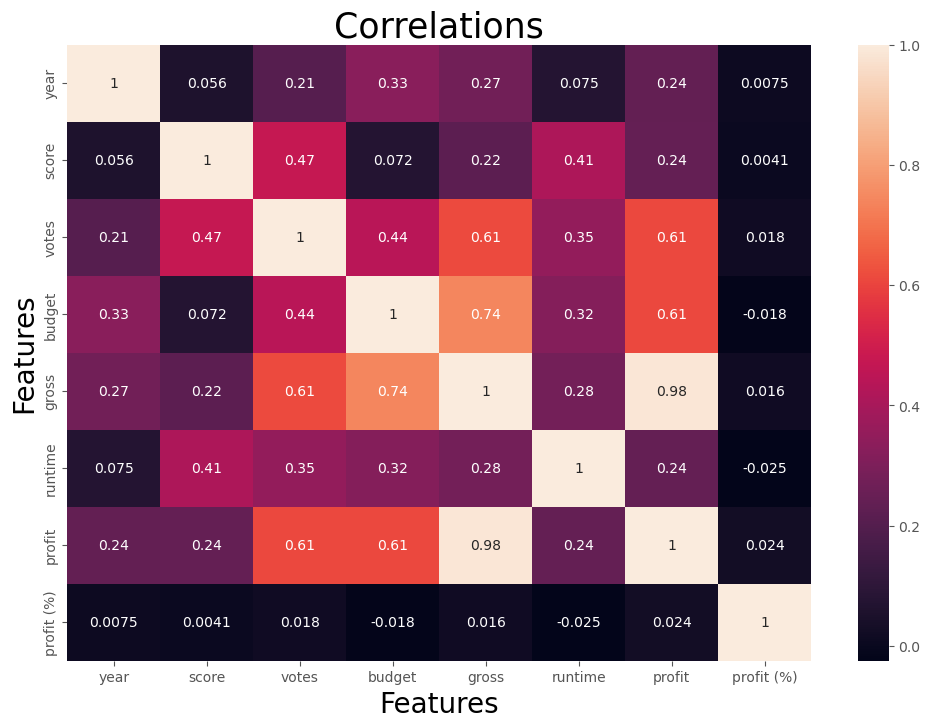

In [91]:
corr_mat = mv.corr()
sns.heatmap(corr_mat,annot=True)
plt.title('Correlations',size=25)
plt.xlabel('Features',size=20)
plt.ylabel('Features',size=20)
plt.show()

In [92]:
mv.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_released,profit,profit (%)
5114,Paranormal Activity,R,Horror,2007,6.3,225000,Oren Peli,Oren Peli,Katie Featherston,United States,15000,193355800,Solana Films,86.0,2009-10-16,193340800,1288938.67
3459,The Blair Witch Project,R,Horror,1999,6.5,239000,Daniel Myrick,Daniel Myrick,Heather Donahue,United States,60000,248639099,Haxan Films,81.0,1999-07-30,248579099,414298.50
6815,The Gallows,R,Horror,2015,4.3,20000,Travis Cluff,Chris Lofing,Reese Mishler,United States,100000,42964410,New Line Cinema,81.0,2015-07-10,42864410,42864.41
2093,El Mariachi,R,Action,1992,6.9,64000,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000,2040920,Columbia Pictures,81.0,1993-02-26,2033920,29056.00
5154,Once,R,Drama,2007,7.8,112000,John Carney,John Carney,Glen Hansard,Ireland,150000,20936722,Bórd Scannán na hÉireann,86.0,2007-06-15,20786722,13857.81


In [93]:
mv_numeric = mv.copy()
for col in mv_numeric:
    if(mv_numeric[col].dtype == 'object'):
        mv_numeric[col] = mv_numeric[col].astype('category')
        mv_numeric[col] = mv_numeric[col].cat.codes
mv_numeric.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_released,profit,profit (%)
5114,2906,6,9,2007,6.3,225000,1452,2292,977,47,15000,193355800,1281,86.0,2009-10-16,193340800,1288938.67
3459,3925,6,9,1999,6.5,239000,375,608,648,47,60000,248639099,773,81.0,1999-07-30,248579099,414298.50
6815,4159,6,9,2015,4.3,20000,1982,476,1437,47,100000,42964410,1044,81.0,2015-07-10,42864410,42864.41
2093,1257,6,0,1992,6.9,64000,1668,2601,237,30,7000,2040920,452,81.0,1993-02-26,2033920,29056.00
5154,2830,6,6,2007,7.8,112000,942,1485,616,22,150000,20936722,317,86.0,2007-06-15,20786722,13857.81


Now we have changed the categorical values to an individual categories with integer values

In [94]:
mv.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_released,profit,profit (%)
5114,Paranormal Activity,R,Horror,2007,6.3,225000,Oren Peli,Oren Peli,Katie Featherston,United States,15000,193355800,Solana Films,86.0,2009-10-16,193340800,1288938.67
3459,The Blair Witch Project,R,Horror,1999,6.5,239000,Daniel Myrick,Daniel Myrick,Heather Donahue,United States,60000,248639099,Haxan Films,81.0,1999-07-30,248579099,414298.50
6815,The Gallows,R,Horror,2015,4.3,20000,Travis Cluff,Chris Lofing,Reese Mishler,United States,100000,42964410,New Line Cinema,81.0,2015-07-10,42864410,42864.41
2093,El Mariachi,R,Action,1992,6.9,64000,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000,2040920,Columbia Pictures,81.0,1993-02-26,2033920,29056.00
5154,Once,R,Drama,2007,7.8,112000,John Carney,John Carney,Glen Hansard,Ireland,150000,20936722,Bórd Scannán na hÉireann,86.0,2007-06-15,20786722,13857.81


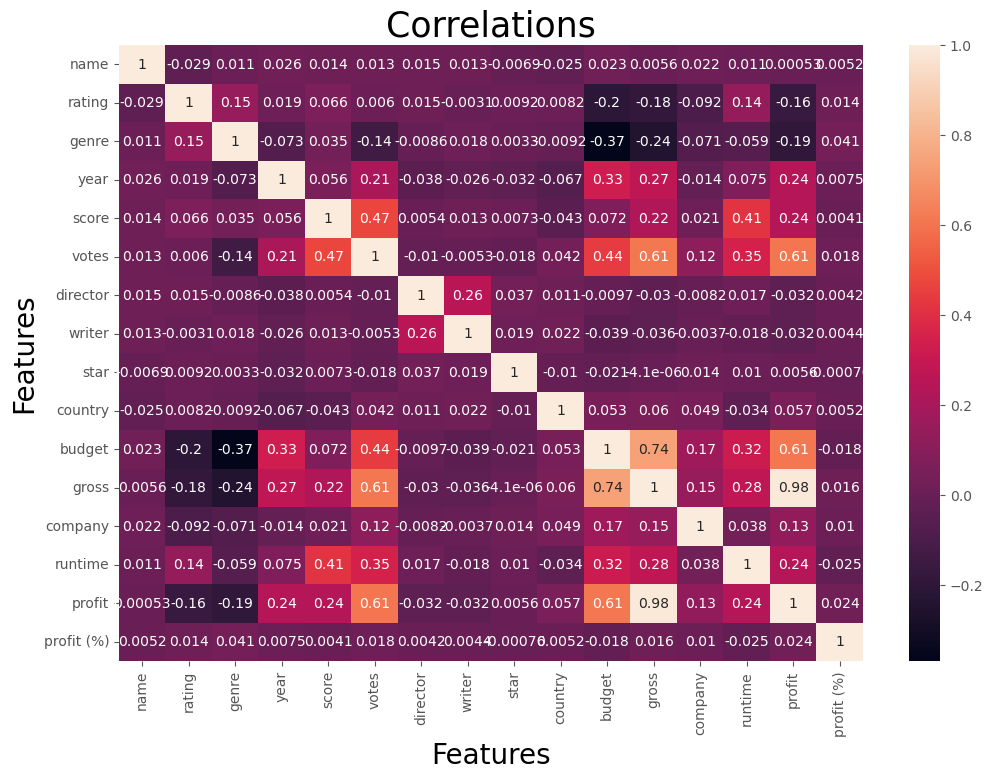

In [95]:
corr_mat = mv_numeric.corr()
sns.heatmap(corr_mat,annot=True)
plt.title('Correlations',size=25)
plt.xlabel('Features',size=20)
plt.ylabel('Features',size=20)
plt.show()


In [96]:
corr_matrix = mv_numeric.corr()
corr_pairs = corr_matrix.unstack()
corr_pairs

name        name          1.000000
            rating       -0.029234
            genre         0.010996
            year          0.025542
            score         0.014450
            votes         0.012615
            director      0.015246
            writer        0.012880
            star         -0.006882
            country      -0.025490
            budget        0.023392
            gross         0.005639
            company       0.021697
            runtime       0.010850
            profit        0.000526
            profit (%)    0.005196
rating      name         -0.029234
            rating        1.000000
            genre         0.147796
            year          0.019499
            score         0.065983
            votes         0.006031
            director      0.014656
            writer       -0.003149
            star          0.009196
            country       0.008230
            budget       -0.203946
            gross        -0.181906
            company 

In [97]:
pd.set_option('display.max_rows',None)

In [98]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre       budget       -0.368523
budget      genre        -0.368523
gross       genre        -0.244101
genre       gross        -0.244101
budget      rating       -0.203946
rating      budget       -0.203946
genre       profit       -0.191190
profit      genre        -0.191190
gross       rating       -0.181906
rating      gross        -0.181906
            profit       -0.160956
profit      rating       -0.160956
genre       votes        -0.135990
votes       genre        -0.135990
rating      company      -0.092357
company     rating       -0.092357
genre       year         -0.073167
year        genre        -0.073167
company     genre        -0.071334
genre       company      -0.071334
year        country      -0.066748
country     year         -0.066748
runtime     genre        -0.059237
genre       runtime      -0.059237
score       country      -0.043051
country     score        -0.043051
writer      budget       -0.039466
budget      writer       -0.039466
director    year    

Column with high correlations

In [99]:
sorted_pairs[sorted_pairs>0.5]

profit      votes         0.609203
votes       profit        0.609203
profit      budget        0.610530
budget      profit        0.610530
votes       gross         0.614751
gross       votes         0.614751
            budget        0.740247
budget      gross         0.740247
gross       profit        0.984428
profit      gross         0.984428
name        name          1.000000
runtime     runtime       1.000000
company     company       1.000000
gross       gross         1.000000
budget      budget        1.000000
country     country       1.000000
star        star          1.000000
writer      writer        1.000000
director    director      1.000000
votes       votes         1.000000
score       score         1.000000
year        year          1.000000
genre       genre         1.000000
rating      rating        1.000000
profit      profit        1.000000
profit (%)  profit (%)    1.000000
dtype: float64

Column with low correlations

In [100]:
sorted_pairs[sorted_pairs<0]

genre       budget       -0.368523
budget      genre        -0.368523
gross       genre        -0.244101
genre       gross        -0.244101
budget      rating       -0.203946
rating      budget       -0.203946
genre       profit       -0.191190
profit      genre        -0.191190
gross       rating       -0.181906
rating      gross        -0.181906
            profit       -0.160956
profit      rating       -0.160956
genre       votes        -0.135990
votes       genre        -0.135990
rating      company      -0.092357
company     rating       -0.092357
genre       year         -0.073167
year        genre        -0.073167
company     genre        -0.071334
genre       company      -0.071334
year        country      -0.066748
country     year         -0.066748
runtime     genre        -0.059237
genre       runtime      -0.059237
score       country      -0.043051
country     score        -0.043051
writer      budget       -0.039466
budget      writer       -0.039466
director    year    

Gross has the highest correlations toward profit while genre has the lowest correlations

#### ***4. Exploratory Data Analysis***

In [101]:
mv.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_released,profit,profit (%)
5114,Paranormal Activity,R,Horror,2007,6.3,225000,Oren Peli,Oren Peli,Katie Featherston,United States,15000,193355800,Solana Films,86.0,2009-10-16,193340800,1288938.67
3459,The Blair Witch Project,R,Horror,1999,6.5,239000,Daniel Myrick,Daniel Myrick,Heather Donahue,United States,60000,248639099,Haxan Films,81.0,1999-07-30,248579099,414298.50
6815,The Gallows,R,Horror,2015,4.3,20000,Travis Cluff,Chris Lofing,Reese Mishler,United States,100000,42964410,New Line Cinema,81.0,2015-07-10,42864410,42864.41
2093,El Mariachi,R,Action,1992,6.9,64000,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000,2040920,Columbia Pictures,81.0,1993-02-26,2033920,29056.00
5154,Once,R,Drama,2007,7.8,112000,John Carney,John Carney,Glen Hansard,Ireland,150000,20936722,Bórd Scannán na hÉireann,86.0,2007-06-15,20786722,13857.81


***4.1 Most Profitable Company***

In [102]:
mv_com = mv.groupby(['name','company'])['budget','gross','profit','profit (%)'].sum().sort_values(by='profit',ascending=False).reset_index()
# Top 10 Profitable Company
top10prof_mvcom = mv_com.head(10)
top10prof_mvcom

,name,company,budget,gross,profit,profit (%)
0,Avatar,Twentieth Century Fox,237000000,2847246203,2610246203,1101.37
1,The Lion King,Walt Disney Pictures,305000000,2754448457,2449448457,2850.86
2,Avengers: Endgame,Marvel Studios,356000000,2797501328,2441501328,685.81
3,Titanic,Twentieth Century Fox,200000000,2201647264,2001647264,1000.82
4,Star Wars: Episode VII - The Force Awakens,Lucasfilm,245000000,2069521700,1824521700,744.70
5,Avengers: Infinity War,Marvel Studios,321000000,2048359754,1727359754,538.12
6,Jurassic World,Universal Pictures,150000000,1670516444,1520516444,1013.68
7,Aladdin,Walt Disney Pictures,211000000,1554744172,1343744172,2174.33
8,Furious 7,Universal Pictures,190000000,1515341399,1325341399,697.55
9,Frozen II,Walt Disney Animation Studios,150000000,1450026933,1300026933,866.68


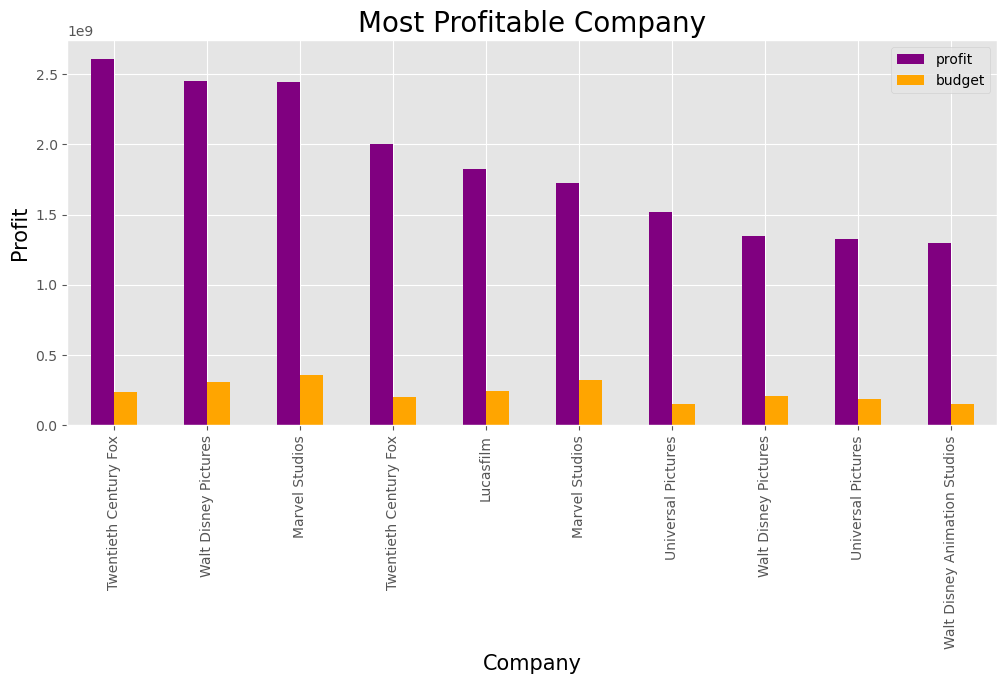

In [103]:
top10prof_mvcom.plot(x='company',y=['profit','budget'],kind='bar',figsize=(12,5), color={'profit':'purple','budget':'orange'})
plt.title('Most Profitable Company',size=20)
plt.xlabel('Company',size=15)
plt.ylabel('Profit',size=15)
plt.show()

***4.2 Most Highest Budget Company***

In [104]:
mv_com = mv.groupby(['name','company'])['budget','gross','profit','profit (%)'].sum().sort_values(by='budget',ascending=False).reset_index()
# Top 10 Highest Budget Company
top10hibud_mvcom = mv_com.head(10)
top10hibud_mvcom

,name,company,budget,gross,profit,profit (%)
0,Avengers: Endgame,Marvel Studios,356000000,2797501328,2441501328,685.81
1,Avengers: Infinity War,Marvel Studios,321000000,2048359754,1727359754,538.12
2,Star Wars: Episode VIII - The Last Jedi,Walt Disney Pictures,317000000,1332698830,1015698830,320.41
3,The Lion King,Walt Disney Pictures,305000000,2754448457,2449448457,2850.86
4,Pirates of the Caribbean: at World's End,Walt Disney Pictures,300000000,960996492,660996492,220.33
5,Justice League,Warner Bros.,300000000,657926987,357926987,119.31
6,Solo: A Star Wars Story,Lucasfilm,275000000,392924807,117924807,42.88
7,Star Wars: Episode IX - The Rise of Skywalker,Walt Disney Pictures,275000000,1078232589,803232589,292.08
8,Superman Returns,Warner Bros.,270000000,391081192,121081192,44.84
9,Tangled,Walt Disney Animation Studios,260000000,592462816,332462816,127.87


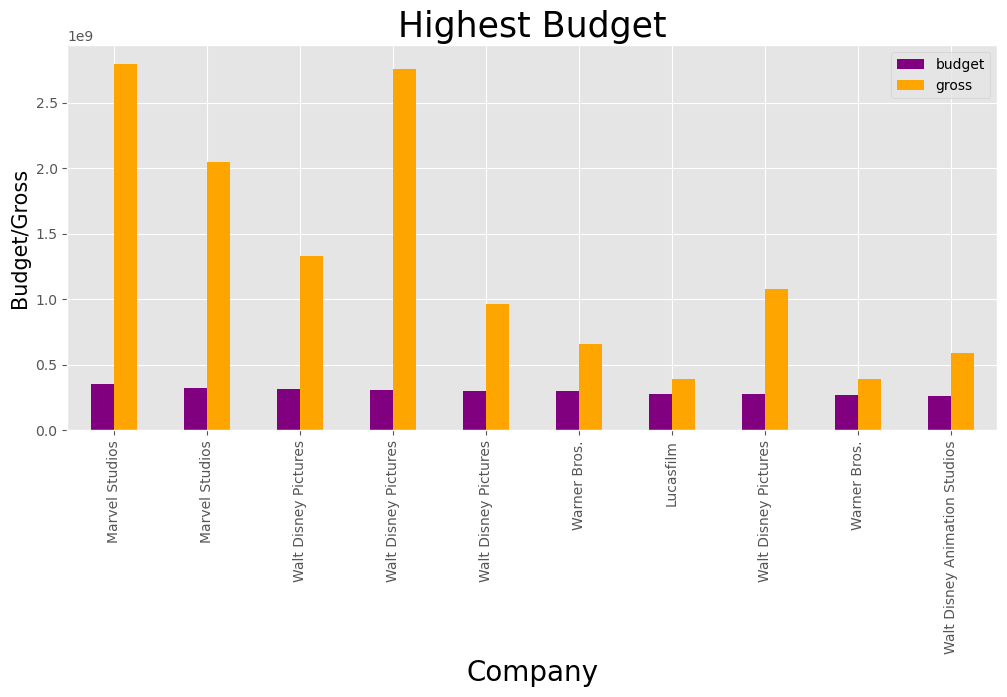

In [105]:
top10hibud_mvcom.plot(x='company',y=['budget','gross'],kind='bar',figsize=(12,5), color={'budget':'purple','gross':'orange'})
plt.title('Highest Budget',size=25)
plt.xlabel('Company',size=20)
plt.ylabel('Budget/Gross',size=15)
plt.show()

***4.3 Most Highest Gross Country***

In [124]:
mv_country = mv.groupby(['country'])['budget','gross','profit','profit (%)'].sum().sort_values(by='gross',ascending=False).reset_index()
# Country Distribution

mv_country = mv_country.head(10)
mv_country

,country,budget,gross,profit,profit (%)
0,United States,161460055145,470794726099,309334670954,2806969.42
1,United Kingdom,16432023780,45351705966,28919682186,105115.17
2,France,3304500000,6568533115,3264033115,17775.71
3,China,1846400000,6305918953,4459518953,6218.12
4,New Zealand,1120100000,6278354563,5158254563,6369.55
5,Canada,2542177000,5734558085,3192381085,42202.11
6,Germany,3344750000,5688083409,2343333409,8841.17
7,Australia,1080950000,2800304264,1719354264,13664.56
8,Japan,638100000,2494214085,1856114085,10106.65
9,Hong Kong,653428966,1412222241,758793275,4013.14


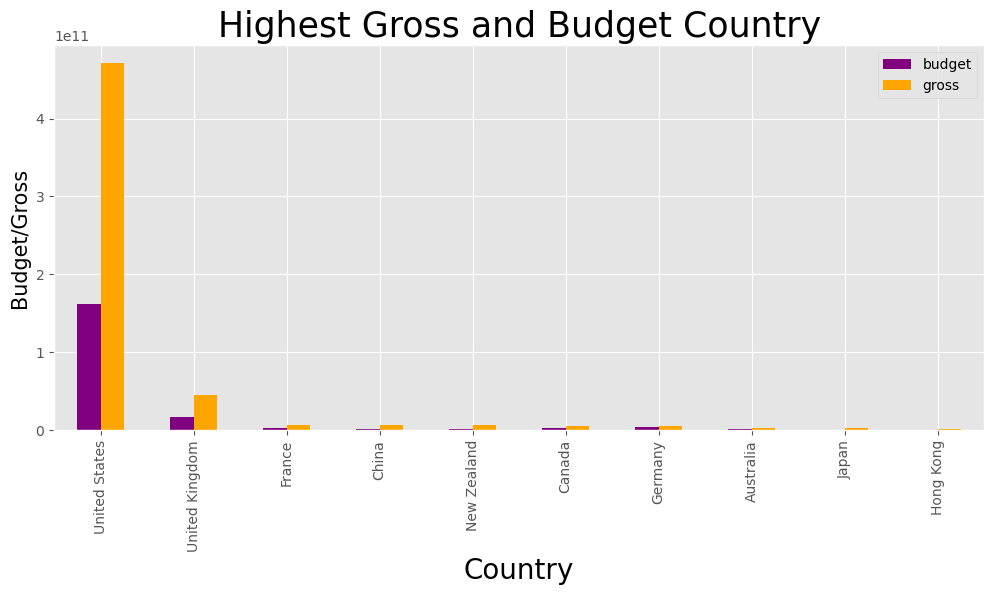

In [138]:
mv_country.plot(x='country',y=['budget','gross'],kind='bar',figsize=(12,5), color={'budget':'purple','gross':'orange'})
plt.title('Highest Gross and Budget Country',size=25)
plt.xlabel('Country',size=20)
plt.ylabel('Budget/Gross',size=15)
plt.show()

***4.4 Star and Directors Wordcloud***

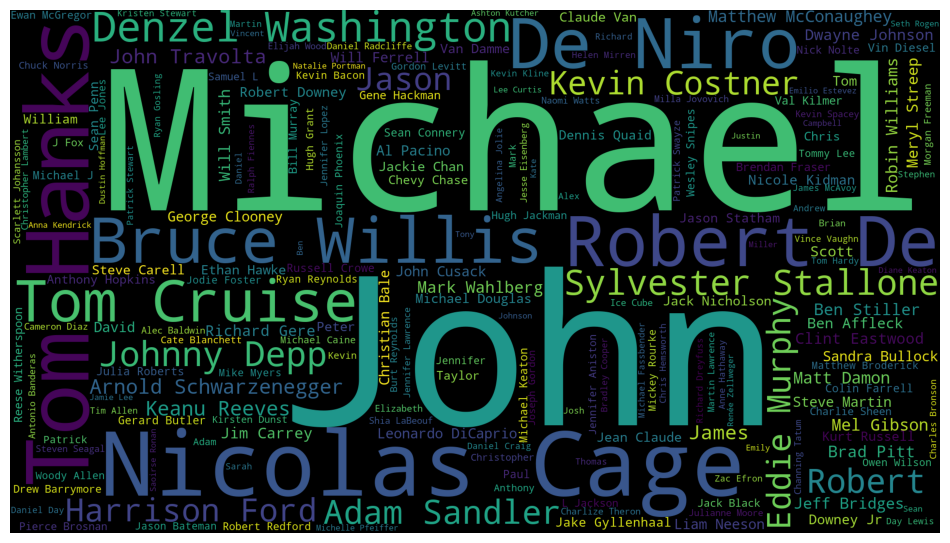

In [107]:
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(mv.star))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

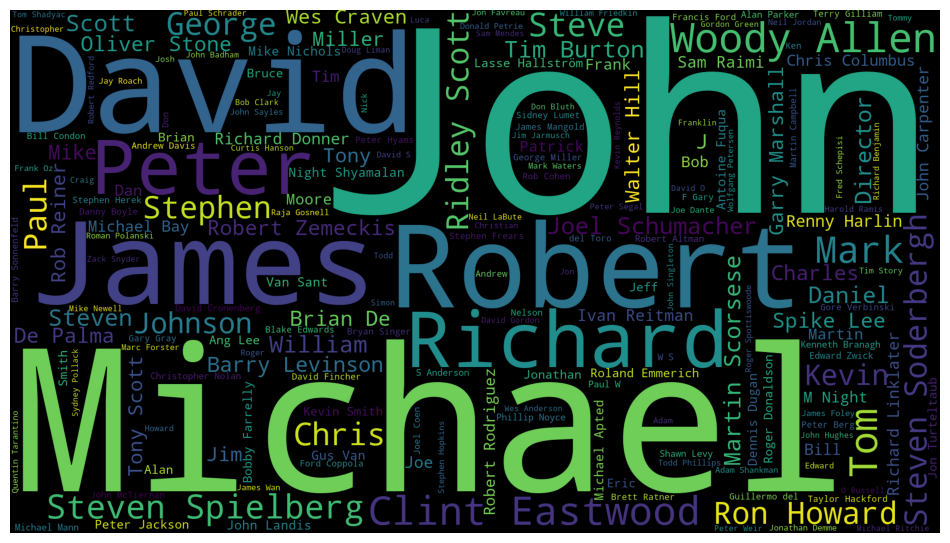

In [108]:
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(mv.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()